In [3]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from glob import glob

In [5]:
images_path = 'C://Users//Home//Downloads//Compressed//archive//flickr8k-sau//Flickr_Data//Images//'
images = glob(images_path+'*.jpg')
len(images)

8091

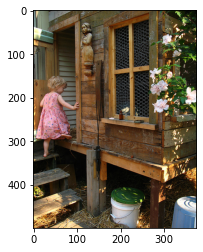

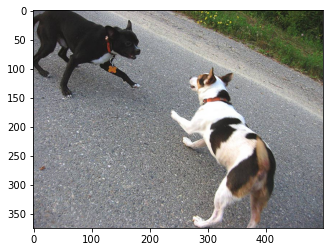

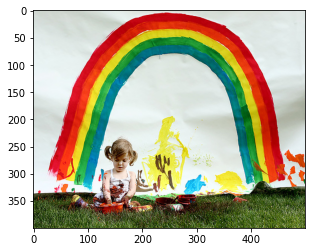

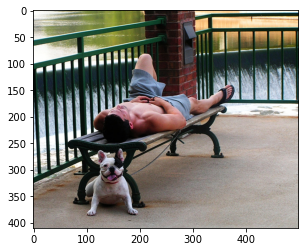

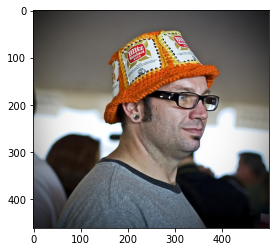

In [6]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

# Importing ResNet
Resnet, essentially produces 1000 output feature extraction. We want the second last layer which has the activation of average pooling which has 2048 feature extracted output.  

In [7]:
from tensorflow.keras.applications import ResNet50
import sys
mod = sys.path.append('C://Users//Home//Downloads//Compressed//archive//flickr8k-sau//Flickr_Data//resnet50_weights_tf_dim_ordering_tf_kernels.h5')
incept_model = ResNet50(weights=mod, include_top=True)

In [8]:
incept_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

# Image Preprocess
Here, we are making a dictionary for all the image ID as key, and predictions of the resnet feature extraction as value.

In [10]:
images[0].split('/')[-1]

'Images\\1000268201_693b08cb0e.jpg'

In [48]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('//')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    

1/1 [==============================] - 1s 942ms/step
50
1/1 [==============================] - 1s 1s/step
100
1/1 [==============================] - 1s 1s/step
150
1/1 [==============================] - 1s 871ms/step


1/1 [==============================] - 1s 1s/step
200
1/1 [==============================] - 1s 1s/step
250
1/1 [==============================] - 1s 975ms/step
300
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 960ms/step
350
1/1 [==============================] - 1s 1s/step
400
1/1 [==============================] - 1s 1s/step
450
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
500
1/1 [==============================] - 1s 1s/step
550
1/1 [==============================] - 2s 2s/step
600
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
650
1/1 [==============================] - 2s 2s/step
700
1/1 [==============================] - 1s 1s/step
750
1/1 [==============================] - 2s 2s/step
800
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step
850
1/1 [==============================] - 2s 2s/step
900
1/1 [==============================] - 2s 2s/step
950
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
1000
1/1 [==============================] - 2s 2s/step
1050
1/1 [==============================] - 2s 2s/step
1100
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
1150
1/1 [==============================] - 2s 2s/step
1200
1/1 [==============================] - 2s 2s/step
1250
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
1300
1/1 [==============================] - 2s 2s/step
1350
1/1 [==============================] - 2s 2s/step
1400
1/1 [==============================] - 2s 2s/step
1450
1/1 [==============================] - 1s 972ms/step


1/1 [==============================] - 1s 542ms/step


In [12]:
len(images_features)

1500

# Text Preprocessing
We are creating a dictionary of all the Image IDs as key and the five captions available as a list of values.

In [40]:
caption_path = 'C:\\Users\\Home\\Downloads\\Compressed\\archive\\flickr8k-sau\\Flickr_Data\\Flickr_TextData\\Flickr8k.token.txt'

captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

len(captions)

40461

In [41]:
captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [46]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass
    
len(captions_dict)

0

In [44]:
captions_dict['1000268201_693b08cb0e.jpg']

KeyError: '1000268201_693b08cb0e.jpg'

In [47]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

KeyError: 'Images\\1000268201_693b08cb0e.jpg'

<Figure size 432x288 with 0 Axes>

# Functions for Text and Image Processing

In [19]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    
    return modified

In [20]:
for key,value in captions_dict.items():
    for i in value:
        captions_dict[key][value.index(i)] = preprocessed(i)

In [21]:
captions_dict['1002674143_1b742ab4b8.jpg']

KeyError: '1002674143_1b742ab4b8.jpg'

# Vocabolary Creation
Number of unique words with their count is stored in count_words

In [22]:
count_words = {}
for key,value in captions_dict.items():
    for i in value:
        for word in i.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

This functions is defined to print first n values of a dictionary.

In [23]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [24]:
print(take(5, count_words.items()))

[]


In [84]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

This function helps in assigning each word with a unique number.

In [85]:
print(take(5, new_dict.items()))

[('startofseq', 1), ('a', 2), ('little', 3), ('girl', 4), ('covered', 5)]


In [86]:
new_dict['<OUT>'] = len(new_dict) 

captions_backup = captions_dict.copy()

captions_dict = captions_backup.copy()

In [87]:
for key, value in captions_dict.items():
    for v in value:
        encoded = []
        for word in v.split():  
                encoded.append(new_dict[word])

        captions_dict[key][value.index(v)] = encoded

Since our model does not understands words, we are labelencoding those words into numbers. Each words has a unique number associated to it. We get captions_dict having key as image name and value as captions converted to integer value.

In [88]:
print(take(1, captions_dict.items()))

[('1002674143_1b742ab4b8.jpg', [[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18], [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18], [1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18], [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18], [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]])]


# Generation Function

In [89]:
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

In [90]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 180, 190, 6, 2, 77, 191, 54, 77, 192, 193, 2, 53, 194, 121, 2, 41, 46, 54, 195, 196, 17, 18]
[1, 23, 131, 6, 23, 77, 122, 19, 706, 2, 700, 701, 467, 2, 128, 265, 23, 131, 6, 23, 245, 385, 707, 73, 621, 151, 93, 17, 18]
[1, 23, 47, 34, 178, 49, 6, 126, 54, 27, 1049, 54, 1050, 318, 281, 6, 2, 1051, 81, 322, 49, 69, 1052, 279, 2, 36, 1053, 6, 1049, 54, 2, 364, 18]
[1, 318, 188, 27, 205, 19, 35, 23, 156, 81, 472, 27, 205, 13, 2, 126, 2264, 29, 442, 298, 19, 149, 83, 2, 626, 465, 156, 318, 147, 567, 279, 2, 523, 1103, 17, 18]


In [91]:
MAX_LEN

36

In [92]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for key, value in caption.items():
        for v in value:
            for i in range(1, len(v)):
                X.append(photo[key])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [93]:
X, y_in, y_out = generator(images_features, captions_dict)

In [94]:
len(X), len(y_in), len(y_out)

(96528, 96528, 96528)

In [95]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [96]:
X.shape, y_in.shape, y_out.shape

((96528, 2048), (96528, 36), (96528, 4074))

In [97]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_in_train, y_in_test, y_out_train, y_out_test = train_test_split(X, y_in, y_out, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import train_test_split

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split([X, y_in], y_out, test_size=0.2, random_state=42)

# # Train random forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# rf_acc = rf.score(X_test, y_test)
# print(f"Random Forest accuracy: {rf_acc}")

# # Train naive bayes model
# nb = MultinomialNB()
# nb.fit(X_train, y_train)
# nb_acc = nb.score(X_test, y_test)
# print(f"Naive Bayes accuracy: {nb_acc}")
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_out_train)

# Train naive bayes model
nb_model = MultinomialNB()
nb_model.fit(y_in_train, y_out_train)

# Evaluate models on test data
rf_acc = rf_model.score(X_test, y_out_test)
nb_acc = nb_model.score(y_in_test, y_out_test)

print("Random Forest accuracy:", rf_acc)
print("Naive Bayes accuracy:", nb_acc)

# Model Creation

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

The model is trained for 50 epochs. The accuracy it generates is 73 %. You can train it for more epochs and use Early Callbacks for better precision. 

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

We will save the model so we don't have to train it again to predict in the future.

In [ ]:
model.save('final_model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

# Predictions

In [ ]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)

I would like to give credit to @programming_hut (YouTube channel) - https://www.youtube.com/@programming_hut

*Thank you*